In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
dialogue_df = pd.read_csv("./final_project/All-seasons.csv", header=0)

In [40]:
#Clean up data
#First let's clean up the data

dialogue_df = dialogue_df[dialogue_df["Season"] != "Season"]
dialogue_df[['Season', 'Episode']] = dialogue_df[['Season', 'Episode']].astype(int)


In [6]:
#Display the master datafreame

dialogue_df.head(10)

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."
5,10,1,Chef,Wow!\n
6,10,1,Mrs. Garrison,Chef?? What kind of questions do you think adv...
7,10,1,Chef,What's the meaning of life? Why are we here?\n
8,10,1,Mrs. Garrison,I hope you're making the right choice.\n
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...


In [7]:

dialogue_df.dtypes

Season        int64
Episode       int64
Character    object
Line         object
dtype: object

In [8]:
#Lines per season

lines_per_season = dialogue_df.groupby("Season").agg("count").reset_index()[["Season", "Line"]]
lines_per_season.index = range(1,19)

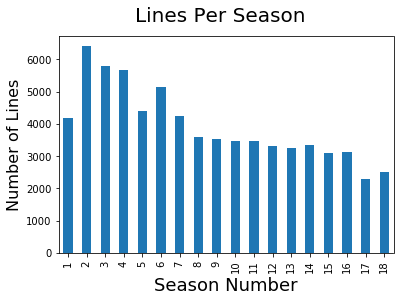

In [9]:
%matplotlib inline


plt.figure().suptitle('Lines Per Season', fontsize=20)
plt.xlabel('Season Number', fontsize=18)
plt.ylabel('Number of Lines', fontsize=16)

lines_per_season["Line"].plot(kind='bar')




In [10]:
#Profranity Study
#Let's analyze the amount of profane language used in southpark
#Create a new column as a boolean to determine if the line contains profanity

from profanity import profanity 
dialogue_df["Swears"] = dialogue_df["Line"].apply(lambda x: profanity.contains_profanity(x))

In [11]:
dialogue_df.head(10)

,Season,Episode,Character,Line,Swears
0,10,1,Stan,"You guys, you guys! Chef is going away. \n",False
1,10,1,Kyle,Going away? For how long?\n,False
2,10,1,Stan,Forever.\n,False
3,10,1,Chef,I'm sorry boys.\n,False
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",False
5,10,1,Chef,Wow!\n,False
6,10,1,Mrs. Garrison,Chef?? What kind of questions do you think adv...,False
7,10,1,Chef,What's the meaning of life? Why are we here?\n,False
8,10,1,Mrs. Garrison,I hope you're making the right choice.\n,False
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...,False


In [12]:
#Extract the lines that contain profane langauge

dirty_lines = dialogue_df[dialogue_df["Swears"] == True]

In [13]:
dirty_lines.head(10)

,Season,Episode,Character,Line,Swears
61,10,1,Clyde,I think... I think he wants to have sex with ...,True
71,10,1,Chef,"Come on, children! You're my sexual fantasy. L...",True
101,10,1,Cartman,"...Man, I can't believe all this time, Chef ju...",True
102,10,1,Kyle,"He didn't want us for sex, fatass! Something i...",True
121,10,1,Marksman,We travel the world and have sex with children!\n,True
124,10,1,Mr. Connolly,"Noo, no, that's the Adventure Club. We're the ...",True
126,10,1,Mr. Connolly,"I know, but it gets even better! From there we...",True
147,10,1,Stan,"Yeah, he joined the Super Adventure Club, and ...",True
149,10,1,Stan,"No, that's the Adventure Club. The Super Adven...",True
161,10,1,Dr. Neeland,"Tell me, what was Chef's favorite thing to do ...",True


In [14]:
#Look for the Character that has the most lines that contain profanity

total_lines_series = dialogue_df.groupby("Character").agg("count")["Line"].reset_index()

In [15]:
total_swears = dirty_lines.groupby("Character").agg("count")["Swears"].reset_index()

In [16]:
#Which characters had the most lines?

total_lines_series.sort_values("Line", ascending=False).head(10)


,Character,Line
621,Cartman,9774
3384,Stan,7680
1832,Kyle,7099
567,Butters,2602
2942,Randy,2467
2314,Mr. Garrison,1002
681,Chef,917
1785,Kenny,881
3228,Sharon,862
2341,Mr. Mackey,633


In [17]:
#Which Charater had the most profane lines

total_swears.sort_values("Swears", ascending=False).head(10)

,Character,Swears
82,Cartman,551
480,Stan,198
264,Kyle,182
261,Kenny,108
418,Randy,85
75,Butters,56
324,Mr. Garrison,53
343,Mrs. Garrison,52
331,Mr. Mackey,33
246,Jimmy,31


In [18]:
joined_profanity = total_swears.merge(total_lines_series, on=["Character"])

In [19]:
joined_profanity["Swear_to_line_ratio"] = joined_profanity["Swears"]/joined_profanity["Line"]

In [20]:
#See which charaters had the highest Swearing to line ratio, this tells us nothing. Let's set a threshold

joined_profanity.sort_values("Swear_to_line_ratio", ascending=False).head(10)

,Character,Swears,Line,Swear_to_line_ratio
275,Librarian,2,2,1.0
294,Man in Barrel,1,1,1.0
237,Japanese Man 5,1,1,1.0
238,Japanese Sailor,1,1,1.0
256,Judge 3,1,1,1.0
266,Lady 2,1,1,1.0
1,A British person,1,1,1.0
276,Lil Kim,1,1,1.0
284,Male Sailor 1,1,1,1.0
285,Male Sailor 2,1,1,1.0


In [21]:
#We Set a thershold of at least 200 lines to Get more useful informaiton

joined_profanity[joined_profanity["Line"] > 200].sort_values("Swear_to_line_ratio", ascending=False).head(10)

,Character,Swears,Line,Swear_to_line_ratio
343,Mrs. Garrison,52,282,0.184397
261,Kenny,108,881,0.122588
451,Satan,13,203,0.064039
37,Bebe,13,221,0.058824
82,Cartman,551,9774,0.056374
324,Mr. Garrison,53,1002,0.052894
331,Mr. Mackey,33,633,0.052133
246,Jimmy,31,597,0.051926
23,Announcer,20,407,0.049140
287,Man,9,211,0.042654


In [22]:
#We Set a thershold of at least 400 lines to Get most prevelant characters


joined_profanity[joined_profanity["Line"] > 400].sort_values("Swear_to_line_ratio", ascending=False).head(10)

,Character,Swears,Line,Swear_to_line_ratio
261,Kenny,108,881,0.122588
82,Cartman,551,9774,0.056374
324,Mr. Garrison,53,1002,0.052894
331,Mr. Mackey,33,633,0.052133
246,Jimmy,31,597,0.051926
23,Announcer,20,407,0.049140
535,Wendy,21,585,0.035897
418,Randy,85,2467,0.034455
90,Chef,30,917,0.032715
480,Stan,198,7680,0.025781


In [23]:
#Let's just look at some of the main charaters

main_characters = joined_profanity[(joined_profanity['Character'] == "Butters") |(joined_profanity['Character'] == "Kenny") |(joined_profanity['Character'] == "Cartman") | (joined_profanity['Character'] == "Stan") | (joined_profanity['Character'] == "Kyle")].sort_values("Swear_to_line_ratio", ascending=False)

main_characters.head()

,Character,Swears,Line,Swear_to_line_ratio
261,Kenny,108,881,0.122588
82,Cartman,551,9774,0.056374
480,Stan,198,7680,0.025781
264,Kyle,182,7099,0.025637
75,Butters,56,2602,0.021522


In [42]:
#Let's Create a model to predict who says what line. We are just going to use the main characters and Randy
#Randy Because there are a lot of Randy-heavy episodes in the Series.

model_df = dialogue_df[(dialogue_df['Character'] == "Butters") |(dialogue_df['Character'] == "Kenny") |(dialogue_df['Character'] == "Cartman") |(dialogue_df['Character'] == "Kyle") |(dialogue_df['Character'] == "Stan") |(dialogue_df['Character'] == "Randy")]
model_df = model_df[["Character", "Line"]]

model_df.head(10)

,Character,Line
0,Stan,"You guys, you guys! Chef is going away. \n"
1,Kyle,Going away? For how long?\n
2,Stan,Forever.\n
4,Stan,"Chef said he's been bored, so he joining a gro..."
9,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...
10,Stan,"Dude, how are we gonna go on? Chef was our fuh..."
17,Randy,"Good-bye, Chef! Have a great time with the Sup..."
19,Kyle,"Draw two card, fatass.\n"
20,Cartman,"Reverse to you, Jew. \n"
21,Stan,I'll get it. \n


In [43]:
#Let's Split the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC



In [44]:
# Now we do a tfidf vectorizer to weight the frequent terms

Lines = model_df["Line"]
y = model_df["Character"]


In [45]:
#TFIDF vecotrizer
v1 = TfidfVectorizer()
X = v1.fit_transform(Lines)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [46]:
clf = LinearSVC()
clf.fit(X_train.toarray(), y_train)

y_pred = clf.predict(X_test.toarray())

print("LinearSVC accuracy:", round((accuracy_score(y_test, y_pred)*100),2))

LinearSVC accuracy: 45.03


In [47]:
#let's run other models and see which one is best

gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())

# comparing actual response values (y_test) with predicted response values (y_pred)

print("Gaussian Naive Bayes accuracy:", round((accuracy_score(y_test, y_pred)*100),2))


Gaussian Naive Bayes accuracy: 22.75


In [48]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train.toarray(), y_train)

y_pred = clf.predict(X_test.toarray())


    
print("Random Forest accuracy:", round((accuracy_score(y_test, y_pred)*100),2))

Random Forest accuracy: 32.24


In [49]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train.toarray(), y_train)

y_pred = clf.predict(X_test.toarray())

print("LogisticRegression accuracy:", round((accuracy_score(y_test, y_pred)*100),2))

LogisticRegression accuracy: 44.68


In [50]:
clf = MultinomialNB()
clf.fit(X_train.toarray(), y_train)

y_pred = clf.predict(X_test.toarray())

print("MultinomialNB accuracy:", round((accuracy_score(y_test, y_pred)*100),2))

MultinomialNB accuracy: 41.37


In [33]:
#Let's see what happens when we remove some stop words from the lines

v1 = TfidfVectorizer(stop_words='english')
X = v1.fit_transform(Lines)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [57]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train.toarray(), y_train)

y_pred = clf.predict(X_test.toarray())


    
print("Random Forest accuracy:", round((accuracy_score(y_test, y_pred)*100),2))


clf = LogisticRegression(random_state=0)
clf.fit(X_train.toarray(), y_train)

y_pred = clf.predict(X_test.toarray())

print("LogisticRegression accuracy:", round((accuracy_score(y_test, y_pred)*100),2))


clf = MultinomialNB()
clf.fit(X_train.toarray(), y_train)

y_pred = clf.predict(X_test.toarray())

print("MultinomialNB accuracy:", round((accuracy_score(y_test, y_pred)*100),2))

clf = LinearSVC()
clf.fit(X_train.toarray(), y_train)

y_pred = clf.predict(X_test.toarray())

print("LinearSVC accuracy:", round((accuracy_score(y_test, y_pred)*100),2))

gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
y_pred = gnb.predict(X_test.toarray())

# comparing actual response values (y_test) with predicted response values (y_pred)

print("Gaussian Naive Bayes accuracy:", round((accuracy_score(y_test, y_pred)*100),2))


#So basically there was no change in the accuracy. I guess tdidf takes care of stop words by giving thema smaller weight

Random Forest accuracy: 32.98
LogisticRegression accuracy: 41.88
MultinomialNB accuracy: 39.53
LinearSVC accuracy: 39.01
Gaussian Naive Bayes accuracy: 36.65


In [56]:
#Let's see the calssication report for the Linear SVC which gave the highest accuracy


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print ("THIS IS THE CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred))

print("\n"*2)


print ("THIS IS THE CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred))

THIS IS THE CONFUSION MATRIX
[[12 16  0 14  4  4]
 [ 8 77  0 29  4 12]
 [ 1  5  1  3  0  3]
 [ 7 32  0 30  1  7]
 [ 2 14  0 12 12  9]
 [ 4 17  0 18  7 17]]



THIS IS THE CLASSIFICATION REPORT
             precision    recall  f1-score   support

    Butters       0.35      0.24      0.29        50
    Cartman       0.48      0.59      0.53       130
      Kenny       1.00      0.08      0.14        13
       Kyle       0.28      0.39      0.33        77
      Randy       0.43      0.24      0.31        49
       Stan       0.33      0.27      0.30        63

avg / total       0.41      0.39      0.38       382



In [ ]:
#Ok lets try ensemble learning. This literally takes like 8 hours to run
%timeit


log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(max_depth=2, random_state=0)
svm_clf = SVC(probability = True)


voting_clf = VotingClassifier(estimators = [('lr', log_clf),
                                        ('rf',rnd_clf),
                                        ('svc',svm_clf)],voting = 'soft')


voting_clf.fit(X_train.toarray(),y_train)

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print (clf.__class__.__name__,accuracy_score(y_test, y_pred))

In [55]:
model_df = dialogue_df[(dialogue_df['Character'] == "Butters") |(dialogue_df['Character'] == "Kenny") |(dialogue_df['Character'] == "Cartman") |(dialogue_df['Character'] == "Kyle") |(dialogue_df['Character'] == "Stan") |(dialogue_df['Character'] == "Randy")]
model_df = model_df[["Season", "Character", "Line"]]

for i in range(1,19):
    
    working_df = model_df[model_df["Season"] == i]
    working_df = working_df[["Character", "Line"]]
    
    Lines = working_df["Line"]
    y = working_df["Character"]
    
    v1 = TfidfVectorizer()
    X = v1.fit_transform(Lines)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LinearSVC()
    clf.fit(X_train.toarray(), y_train)

    y_pred = clf.predict(X_test.toarray())

    print("Season", i, "LinearSVC accuracy:", round((accuracy_score(y_test, y_pred)*100),2))
    

Season 1 LinearSVC accuracy: 52.1
Season 2 LinearSVC accuracy: 48.27
Season 3 LinearSVC accuracy: 45.43
Season 4 LinearSVC accuracy: 41.03
Season 5 LinearSVC accuracy: 47.49
Season 6 LinearSVC accuracy: 44.86
Season 7 LinearSVC accuracy: 40.2
Season 8 LinearSVC accuracy: 44.96
Season 9 LinearSVC accuracy: 41.32
Season 10 LinearSVC accuracy: 41.91
Season 11 LinearSVC accuracy: 44.9
Season 12 LinearSVC accuracy: 44.34
Season 13 LinearSVC accuracy: 41.69
Season 14 LinearSVC accuracy: 44.54
Season 15 LinearSVC accuracy: 42.24
Season 16 LinearSVC accuracy: 39.28
Season 17 LinearSVC accuracy: 44.4
Season 18 LinearSVC accuracy: 39.01
